In [17]:
import sys
sys.path.append("../assignment_code/")
import utils 
import bonus_task 
from model import BasicNetwork
from pathlib import Path 
import torch
from torchvision.transforms import Resize
from torchvision.transforms.functional import pil_to_tensor


In [48]:
# Set up the trained model
model_path = "/home/gusandmich@GU.GU.SE/assignment_1/runs/bonus_task/outputs/model.pth"
model = BasicNetwork(utils.NUM_CLASSES, 64)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(model_path, weights_only=True))
model.to(device)

# Get character-level mappings
mappings_path = "/scratch/lt2326-2926-h24/ThaiOCR/ThaiOCR-TrainigSet/Numeric/20110202-List-Code-Character-OCR-Training-Database.txt"
char_mappings = bonus_task.get_character_mappings(mappings_path)

In [2]:
image_path = "/scratch/lt2326-2926-h24/ThaiOCR/ThaiOCR-TestSet/Book/Image/200dpi_BW/bc_001sb.bmp"

label = """
Lower  left  corner  :  (4 , 3)
Upper  right  corner  :  (6 , 5)
"""

segment = """
bc_001sg.bmp;5;344;336;TXT
bc_001sg.bmp;5;775;471;TXT
"""

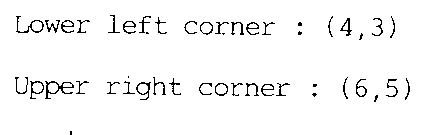

In [3]:
# First segment out the image zone
segment = bonus_task.Segment(image_path, 344, 336, 775, 471)
segment.get_image_of_segment()
display(segment.img)

In [9]:
# Get the segment images
# You can see that 
# (1) Text is given in correct reading order
# (2) Letters are generally segmented correctly, but it sometimes struggles with
# joining multiple letters together (eg "Lo", "pe")
segment.get_characters_in_segment()

for x in segment.char_images:
    display(x)
    

In [52]:
# Run the trained model on the input data and get predictions
# Unfortunately, performance is really poor! 
# I wonder if the model can't generalize well to unseen data. 
# Note that the mappings look a little weird because the provided character mapping is in an 
# encoding I haven't been able to convert to Thai letters. 
# All that's really important is that the English letters we *should* be seeing (which are 
# encoded sensibly) don't show up! 

final_text = []

for x in segment.char_images:
    img = pil_to_tensor(x).float().to(device)
    resized_image = Resize(size=(64, 64))(img)
    input = torch.unsqueeze(resized_image, 0)
    pred = model(input)
    print("Letter: ")
    display(x)
    most_likely = [char_mappings[x] for x in pred[0].argsort(dim=0, descending=True)[:5].cpu().numpy()]
    print(most_likely)
    final_text.append(most_likely[0])

print(f"Final predicted text: ")
print("".join(final_text))

Letter: 


['°', 'Î', 'ß', 'Íè', '±']
Letter: 


['¸', 'ß', 'Î', '°(µÔ´)', 'm']
Letter: 


['°(µÔ´)', 'ä', 'ã', 'i', 'Ì']
Letter: 


['i', 'l', 'Íè', 'I', 'ß']
Letter: 


['n', 'ÍÓ', 'Ä', 'p', 'Ê']
Letter: 


['°(µÔ´)', 'ä', 'm', 'g', 'ã']
Letter: 


['Ê×(µÔ´)', 'ÊÕ(µÔ´)', 'm', '¡', 'ß']
Letter: 


['i', 'm', 'Ê×(µÔ´)', 'ÊÕ(µÔ´)', 'Íè']
Letter: 


['i', 'ß', '°(µÔ´)', 'l', 'ä']
Letter: 


['i', 'I', 'l', '°(µÔ´)', 'Íè']
Letter: 


['i', 'l', 'Íè', 'ß', 'I']
Letter: 


['i', 'l', 'I', 'ã', 'Íè']
Letter: 


['°(µÔ´)', 'ä', 'i', 'ã', 'Ê×(µÔ´)']
Letter: 


['i', 'l', 'Íè', 'I', 'ß']
Letter: 


['b', 'ß', '²', 't', 'h']
Letter: 


['¢', '°(µÔ´)', '£', '±', '¸']
Letter: 


['¡', 'ß', 'm', '°(µÔ´)', 'Ê×(µÔ´)']
Letter: 


['m', 'µ', 'I', 'y', 'i']
Letter: 


['Í', 'Â', '£', 'Î', '¢']
Letter: 


['Íè', '¿é(µÔ´)', '°', '½é(µÔ´)', 'm']
Letter: 


['K', 'g', 'Ì', 'R', 'È']
Letter: 


['i', 'Íè', 'l', 'I', '.']
Letter: 


['ß', 'i', '°(µÔ´)', 'l', '¾']
Letter: 


['°', '£', 'i', 'l', '¦']
Letter: 


['i', 'l', 'Íè', 'I', 'ß']
Letter: 


['i', 'l', 'Íè', 'I', 'ß']
Letter: 


['ÍÓ', '°', 'ÍØ', 'ÍÔ', 'Íê']
Letter: 


['ß', 'y', 't', '²', 'i']
Letter: 


['Íè', 'i', 'l', '.', 'I']
Letter: 


['m', 'Ê×(µÔ´)', 'ÊÕ(µÔ´)', '\xad', 'ä']
Letter: 


['i', 'l', 'I', '°(µÔ´)', 'Íè']
Letter: 


['i', '°(µÔ´)', 'I', 'l', 'ä']
Letter: 


['i', 'l', 'Íè', 'I', 'ß']
Letter: 


['i', 'l', 'Íè', 'I', '.']
Letter: 


['°(µÔ´)', 'i', 'ä', 'Ê×(µÔ´)', 'ã']
Letter: 


['i', 'l', 'Íè', 'ß', 'I']
Letter: 


['b', '¸', 'Íê', 'ß', 'Íç']
Letter: 


['°(µÔ´)', '¡', 'ã', 'ß', 'ä']
Letter: 


['m', 'i', 'ä', 'ÊÔ(µÔ´)', '¦']
Letter: 


['£', 'm', '¢', '±', '½é(µÔ´)']
Letter: 


['i', 'Íè', 'Ê×(µÔ´)', 'ÊÕ(µÔ´)', 'm']
Letter: 


['K', 'Î', 'È', 'Í', 'R']
Final predicted text: 
°¸°(µÔ´)in°(µÔ´)Ê×(µÔ´)iiiii°(µÔ´)ib¢¡mÍÍèKiß°iiÍÓßÍèmiiii°(µÔ´)ib°(µÔ´)m£iK
